In [25]:
import torch
import requests
from matplotlib.pyplot import imshow
from sympy.polys.polyconfig import query
import random
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt
from pycocotools.coco import COCO
import pycocotools.mask as mask_util
import numpy as np
import os

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();
weights = '/home/eas/Enol/pycharm_projects/clipseg/logs/rd64-7K-vit16-cbh-coco-enol/weights.pth'

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load(weights, map_location=torch.device('cpu')), strict=False);

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
[{'segmentation': {'counts': 'V4=g7L3M4LfVg0`0XhXOb00O100O100O100O100O100O100O100O100O100O10TIZO^6a0gIFR62VJ5c5CeJe0W67I7I4L0O010000O10000O10000O10000O10O1000O10000O102N4K5L4L4K5L4L4K5L]90aF2N2N3M2N2N2N2N2N3mM2QLOo3i0YKWOg4i0YKWOg4i0YKWOg4i0YKWOg4i0YKXOf4h0ZKXOf4h0ZKXOf4h0ZKXOf4h0ZKXOf4h0ZKXOf4h0ZKYOd4h0\\KXOd4g0]KYOc4g0]KYOc4g0\\KZOd4f0\\KZOd4f0\\K[Oc4e0]K[Oc4e0]K[Oc4e0]K[Oc4e0]K[Oc4e0]K[Oc4e0]K\\Oo4ZOeJb0<4o4\\OlKd0T4^OjK=Z4FdK1e41YKFP5<Y12N2N2N000O100000000000000O10000002N3M3M3M3M3M3M3Mag00[XO4L4L4L4N200000000mK_Og0a0UOCk0=QOGo09mNKT14gN1Y1OcN5A[OD`0g09E\\O_O;h0<J^OYO6j0?M_OUO2n0?MDPOMS1?MGWO@l0i0MGi19WNGi19WNGh1:XNFh1:XNFh1:XNFh1:XNFh1:XNFh1:gLA85Q39hL8A_Og39cL', 'size': [256, 256]}, 'bbox': [0, 5, 256, 236], 'area': 5910, 'image_id': 'd1e1bf13e_6.jpg', 'category_id': 1, 'iscrowd': 0, 'id': 785}]


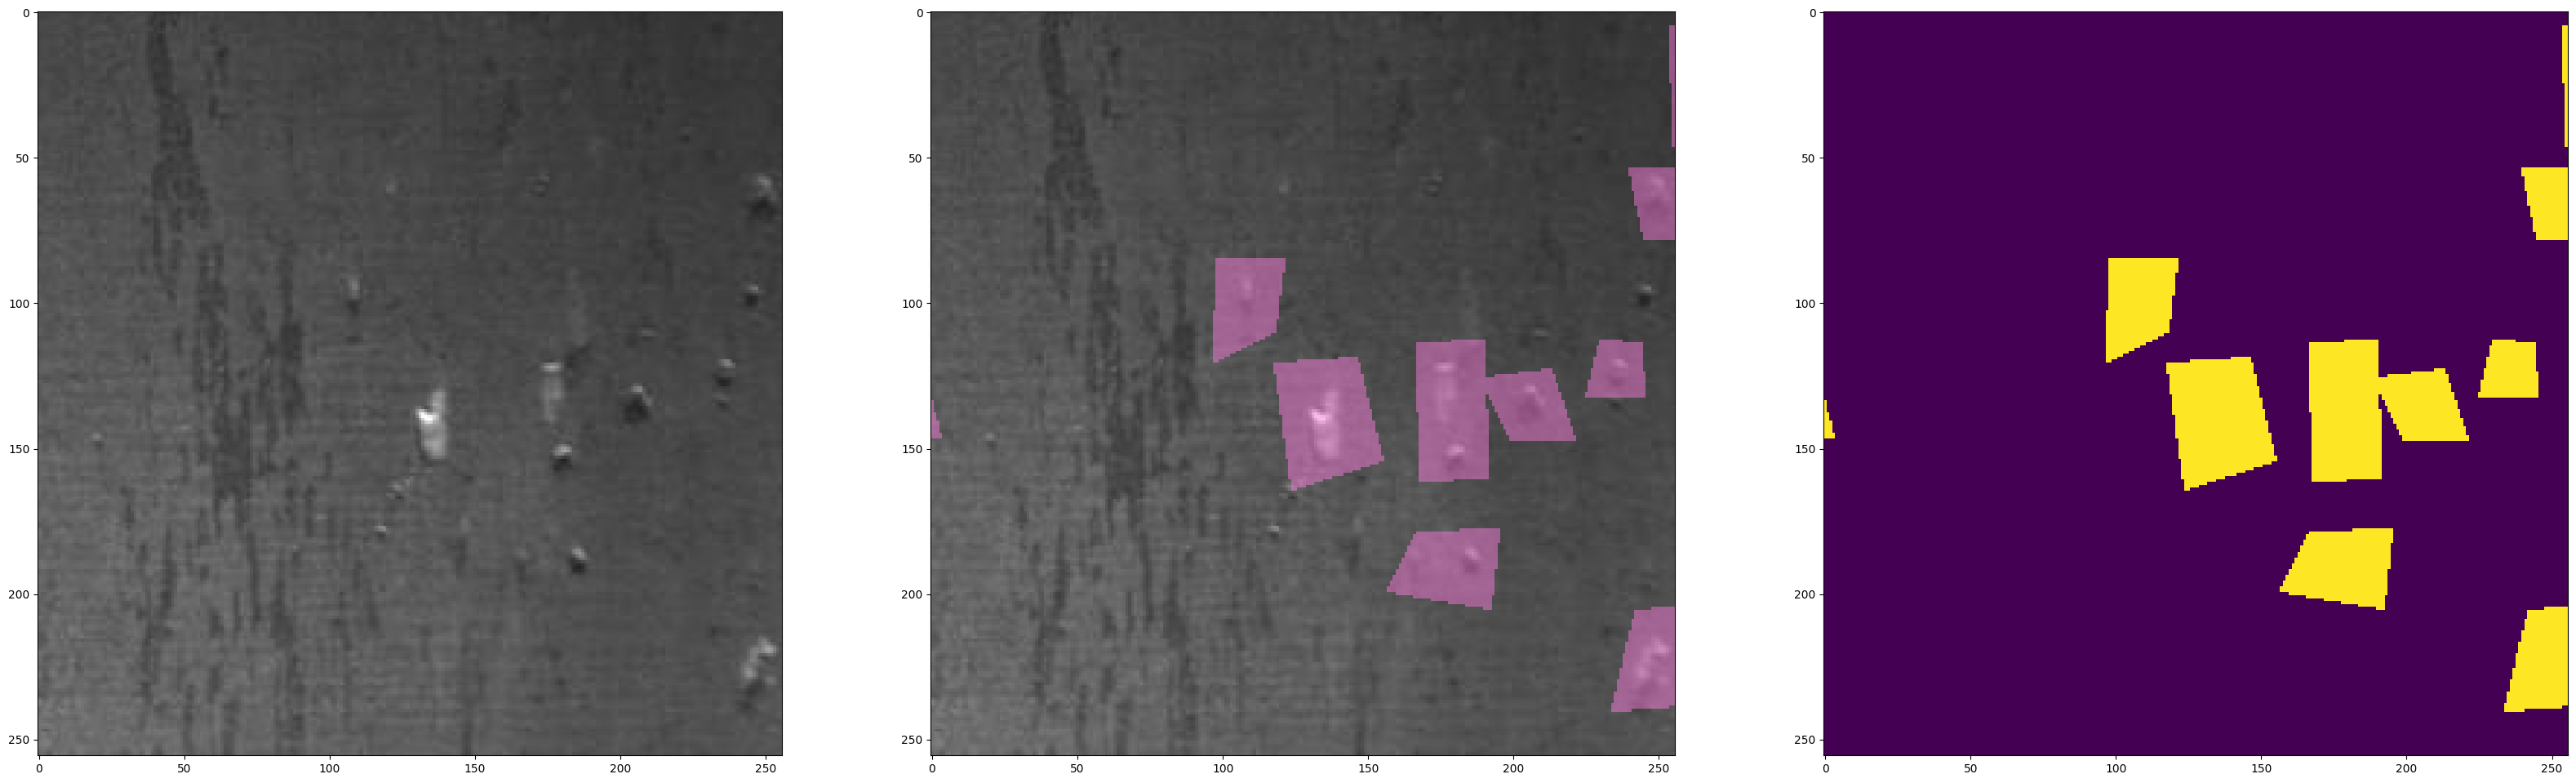

In [38]:
images_path = '/home/eas/Enol/pycharm_projects/clipseg/third_party/Severstal/train_subimages'
coco = COCO(f"/home/eas/Enol/pycharm_projects/clipseg/third_party/Severstal/annotations_COCO_val.json")
query = random.choice(coco.anns)
support = random.choice(coco.anns)
query_image = Image.open(os.path.join(images_path, query['image_id']))
query_class = query['category_id']
ann_id = query['id']
binary_mask = mask_util.decode(query['segmentation'])
support_image = Image.open(os.path.join(images_path, support['image_id']))
support_class = support['category_id']

_,ax = plt.subplots(1,3,figsize=(40,15 * 2))
annIds = coco.getAnnIds(imgIds=[query['image_id']])
anns = coco.loadAnns(annIds)
print(anns)
ax[0].imshow(query_image)
ax[1].imshow(query_image)
plt.sca(ax[1])
coco.showAnns(anns, draw_bbox=False)
ax[2].imshow(binary_mask)

In [16]:
import torch
# predict
encoded_prompt = processor(images=[defect], return_tensors='pt')
results = []
for i, block in enumerate(blocks):
    encoded_image = processor(images=[block], return_tensors='pt')

    with torch.no_grad():
      outputs = model(**encoded_image, conditional_pixel_values = encoded_prompt.pixel_values)

    preds = outputs.logits.unsqueeze(1)
    preds = torch.transpose(preds, 0, 1).squeeze(0)
    results.append(torch.sigmoid(preds[0]))
    
_, ax = plt.subplots(1,1, figsize=(4, 4))
ax.imshow(defect)

_, ax = plt.subplots(1, 5, figsize=(20, 10))
[a.axis('off') for a in ax.flatten()]
[ax[i].imshow(blocks_bounded[i]) for i in range(5)]

_, ax = plt.subplots(1, 5, figsize=(20, 8))
[a.axis('off') for a in ax.flatten()]
[ax[i].imshow(results[i]) for i in range(5)]






NameError: name 'processor' is not defined

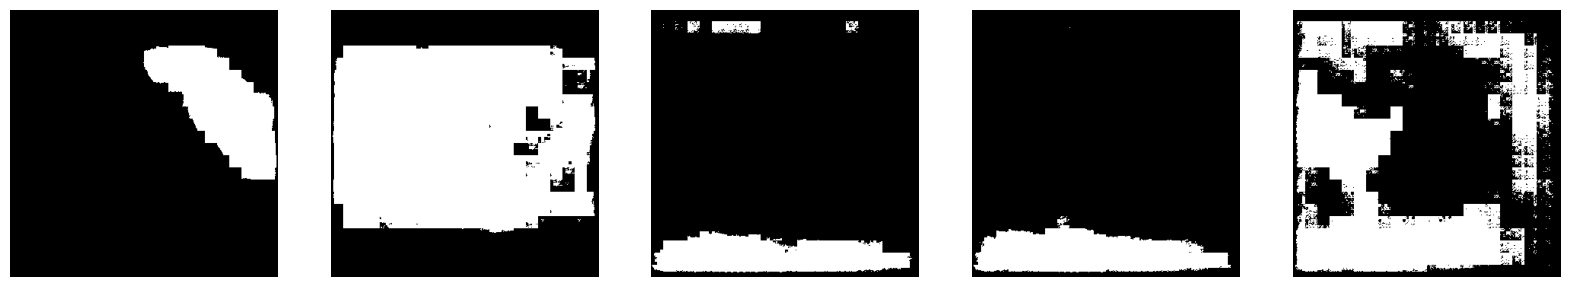

In [15]:

filenames = [f"mask_{i}.png" for i in range(5)]
result_masks = []
_, ax = plt.subplots(1, 5, figsize=(20, 10))
[a.axis('off') for a in ax.flatten()]
# here we save the second mask
for i, filename in enumerate(filenames):  
    plt.imsave(filename,results[i])
    img = cv2.imread(filename)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, result_mask) = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)
    result_masks.append(result_mask)
    ax[i].imshow(result_mask, cmap='gray')
     


In [16]:
'''
results_path = f'/home/eas/Enol/clipseg/severstal-steel-defect-detection/results/{target_class}'
dir_name = image_name[0:9]
path = os.path.join(results_path, dir_name)
if not os.path.exists(path):
    os.mkdir(path)

plt.imsave(f'{path}/defect.png',defect)

for i, block in enumerate(blocks_bounded):
    plt.imsave(f'{path}/image_block_{i}.png', block)

for i, result in enumerate(results):
    plt.imsave(f'{path}/heatmap_{i}.png', result)
    
for i, mask in enumerate(result_masks):
    plt.imsave(f'{path}/result_mask_{i}.png', mask)
    
'''

"\nresults_path = f'/home/eas/Enol/clipseg/severstal-steel-defect-detection/results/{target_class}'\ndir_name = image_name[0:9]\npath = os.path.join(results_path, dir_name)\nif not os.path.exists(path):\n    os.mkdir(path)\n\nplt.imsave(f'{path}/defect.png',defect)\n\nfor i, block in enumerate(blocks_bounded):\n    plt.imsave(f'{path}/image_block_{i}.png', block)\n\nfor i, result in enumerate(results):\n    plt.imsave(f'{path}/heatmap_{i}.png', result)\n    \nfor i, mask in enumerate(result_masks):\n    plt.imsave(f'{path}/result_mask_{i}.png', mask)\n    \n"